In [75]:
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import freeman
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [18]:
g = freeman.load('network.gml')

In [19]:
atbats = pd.read_csv('atbats.csv')
pitchers = atbats.pitcher_id.unique()

In [21]:
pitcher_data = pd.read_csv('pitcher_data.csv')

In [22]:
bc = nx.betweenness_centrality(g)
dc = nx.degree_centrality(g)
cc = nx.closeness_centrality(g)

In [23]:
pitcher_metrics = {}
for pitcher in pitchers:
    pitcher_metrics[pitcher] = {
        'betweness': bc[pitcher],
        'degree': dc[pitcher],
        'closeness': cc[pitcher]
    }

In [24]:
data = pd.DataFrame({
    'pitcher_id': [n for n in pitcher_metrics.keys()],
    'betweness': [n['betweness'] for n in pitcher_metrics.values()],
    'degree': [n['degree'] for n in pitcher_metrics.values()],
    'closeness': [n['closeness'] for n in pitcher_metrics.values()]
})

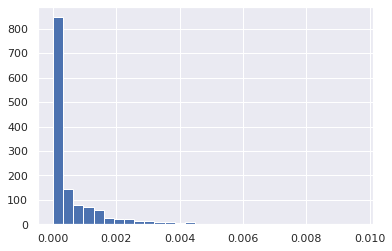

In [129]:
plt.hist(data.betweness, bins=30);

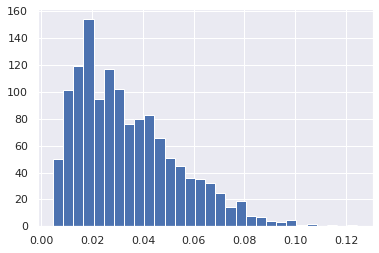

In [130]:
plt.hist(data.degree, bins=30);

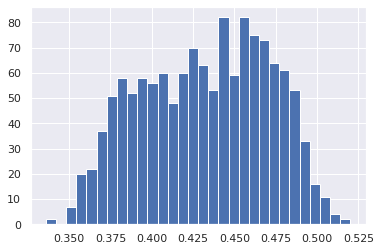

In [131]:
plt.hist(data.closeness, bins=30);

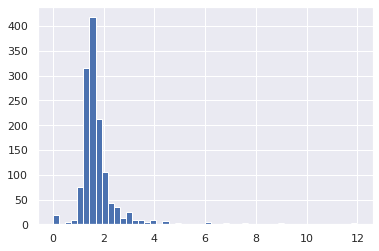

In [133]:
plt.hist(pitcher_data.WHIP, bins=50);

In [120]:
merged = pd.merge(data, pitcher_data, on=['pitcher_id'], how='inner')
merged = merged[['WHIP', 'closeness', 'degree', 'betweness']]

In [122]:
for column in merged.columns:
    max_value = merged[column].max()
    min_value = merged[column].min()
    merged[column] = (merged[column] - min_value)/(max_value - min_value)

In [123]:
model = sm.OLS(merged['WHIP'], merged[['closeness', 'degree', 'betweness']], missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   WHIP   R-squared (uncentered):                   0.700
Model:                            OLS   Adj. R-squared (uncentered):              0.699
Method:                 Least Squares   F-statistic:                              1030.
Date:                Mon, 26 Oct 2020   Prob (F-statistic):                        0.00
Time:                        20:36:59   Log-Likelihood:                          1323.5
No. Observations:                1329   AIC:                                     -2641.
Df Residuals:                    1326   BIC:                                     -2625.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
closeness      0.6367      0.028     23.056      0.000       0.583       0.691
degree        -0.9573      0.071    -13.542      0.000      -1.096      -0.819
betweness      0.5771      0.070      8.186      0.000       0.439       0.715
==============================================================================
Omnibus:                      971.426   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22253.258
Skew:                           3.143   Prob(JB):                         0.00
Kurtosis:                      22.036   Cond. No.                         26.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""